In [1]:
import pandas as pd

df = pd.read_csv('Normalization.csv')

# 查看数据的基本信息
print(df.info())
print(df.describe())
print(df.isnull().sum())  # 检查缺失值


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 2092 entries, macsidnumber to cvlfrhaart^2
dtypes: float64(2085), int64(7)
memory usage: 12.8 MB
None
       macsidnumber  esthivdate  lastnopdate_one  esthaartinit  \
count    800.000000  800.000000       800.000000    800.000000   
mean       0.490000    0.238964         0.263135      0.263539   
std        0.355203    0.325834         0.329046      0.331953   
min        0.000000    0.000000         0.000000      0.000000   
25%        0.333333    0.000001         0.000001      0.000001   
50%        0.333333    0.000003         0.042096      0.043115   
75%        0.666667    0.504033         0.507588      0.503059   
max        1.000000    1.000000         1.000000      1.000000   

       frstpardate_one   visitdate  Precipitation  Temperature    SPWPM2.5  \
count     8.000000e+02  800.000000     800.000000   800.000000  800.000000   
mean      2.737245e-01    0.483495       0.018388     0.606862    

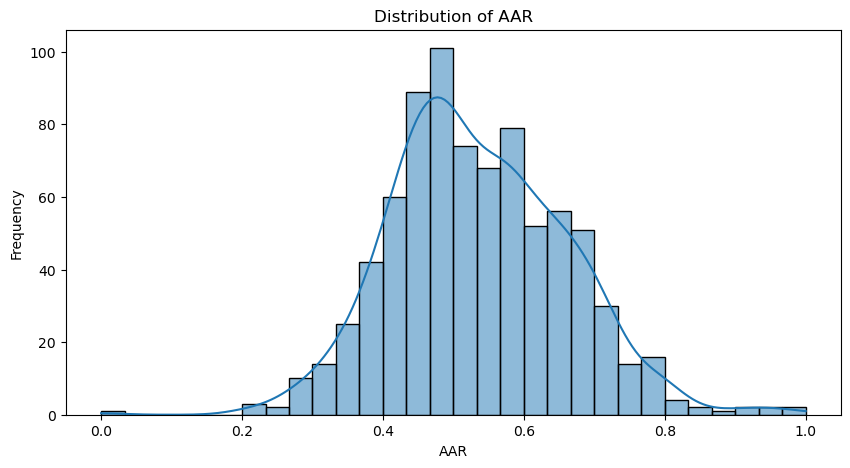

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化因变量的分布
plt.figure(figsize=(10, 5))
sns.histplot(df['aar'], bins=30, kde=True)
plt.title('Distribution of AAR')
plt.xlabel('AAR')
plt.ylabel('Frequency')
plt.show()



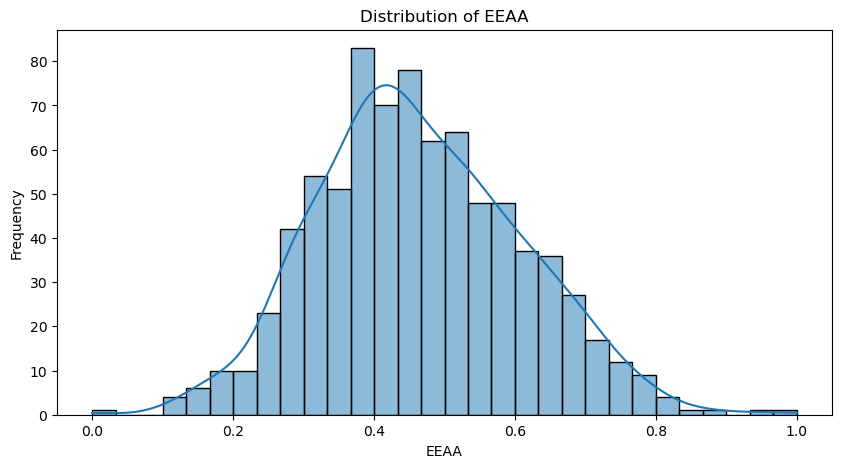

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化因变量的分布
plt.figure(figsize=(10, 5))
sns.histplot(df['eeaa'], bins=30, kde=True)
plt.title('Distribution of EEAA')
plt.xlabel('EEAA')
plt.ylabel('Frequency')
plt.show()


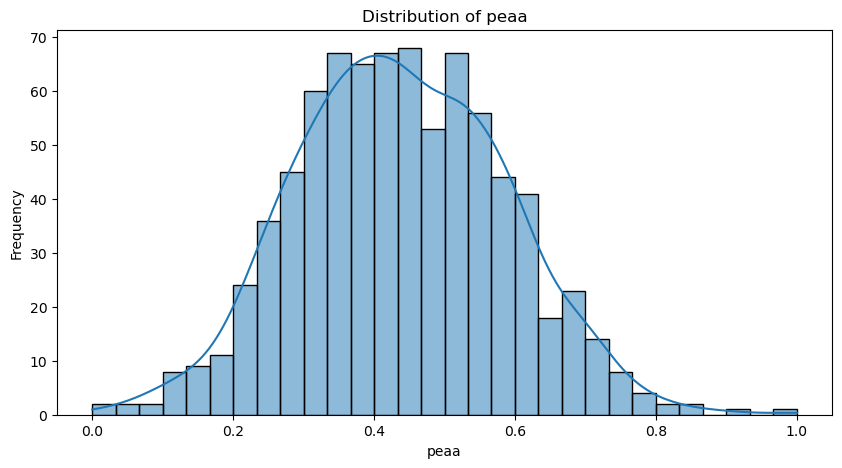

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化因变量的分布
plt.figure(figsize=(10, 5))
sns.histplot(df['peaa'], bins=30, kde=True)
plt.title('Distribution of peaa')
plt.xlabel('peaa')
plt.ylabel('Frequency')
plt.show()

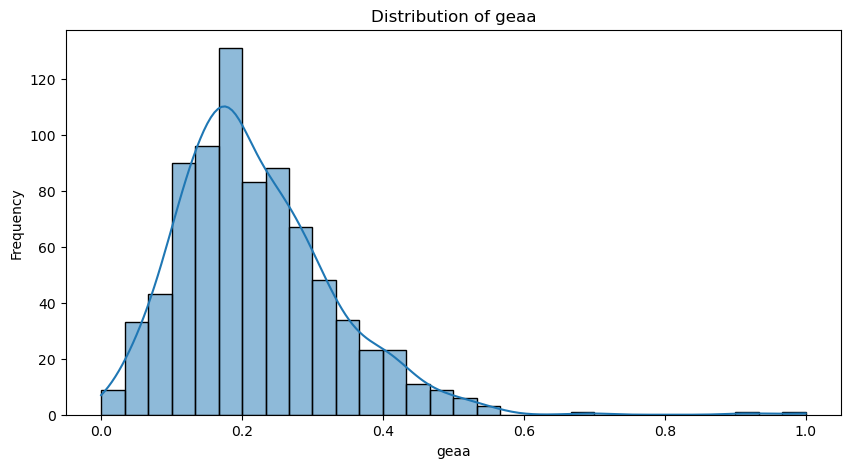

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化因变量的分布
plt.figure(figsize=(10, 5))
sns.histplot(df['geaa'], bins=30, kde=True)
plt.title('Distribution of geaa')
plt.xlabel('geaa')
plt.ylabel('Frequency')
plt.show()

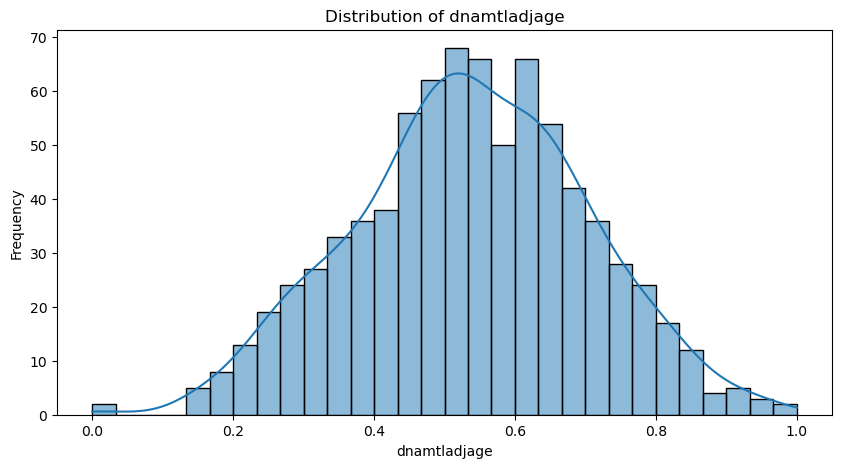

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化因变量的分布
plt.figure(figsize=(10, 5))
sns.histplot(df['dnamtladjage'], bins=30, kde=True)
plt.title('Distribution of dnamtladjage')
plt.xlabel('dnamtladjage')
plt.ylabel('Frequency')
plt.show()

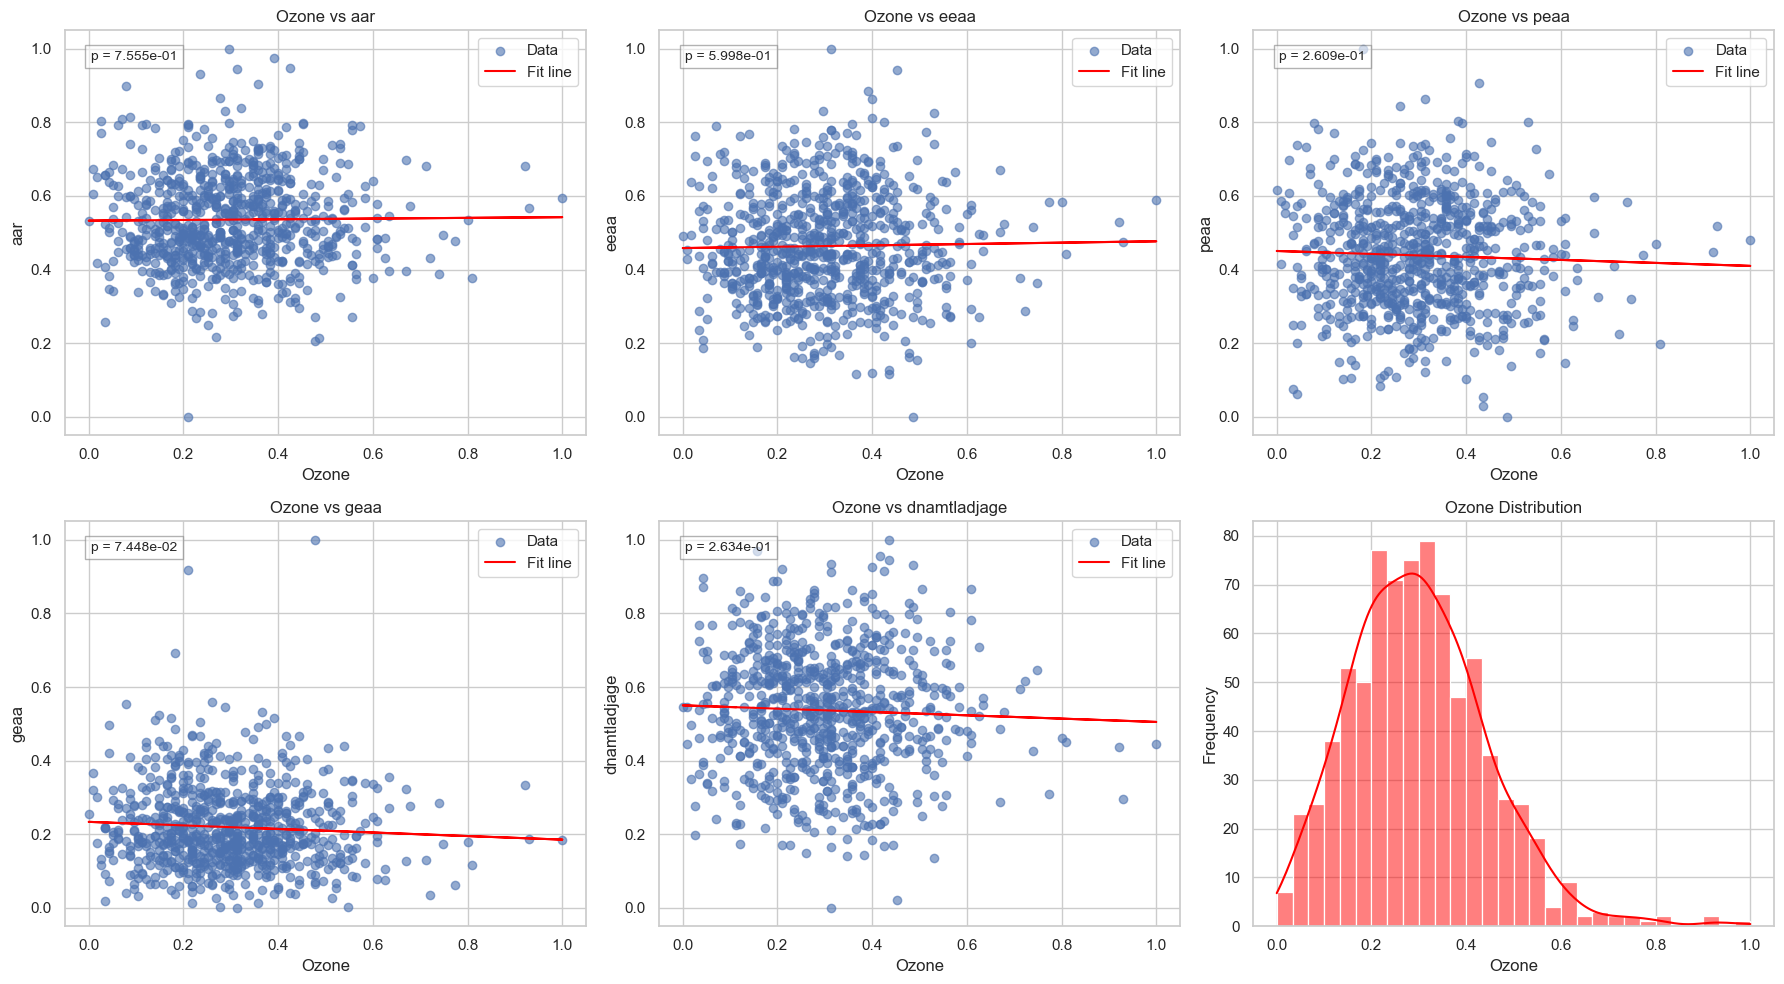

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# 定义因变量列表
dependent_vars = ['aar', 'eeaa', 'peaa', 'geaa', 'dnamtladjage']

# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# 绘制散点图 + 拟合线 + p值 + 图例
for i, var in enumerate(dependent_vars):
    x = df['Ozone']
    y = df[var]

    # 绘制散点
    axes[i].scatter(x, y, alpha=0.6, label='Data')

    # 线性回归
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    axes[i].plot(x, line, color='red', label=f'Fit line')

    # 添加标题和标签
    axes[i].set_title(f'Ozone vs {var}')
    axes[i].set_xlabel('Ozone')
    axes[i].set_ylabel(var)
    axes[i].grid(True)

    # 添加 p 值注释
    axes[i].text(0.05, 0.95, f'p = {p_value:.3e}', transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

    # 添加图例
    axes[i].legend()

# 最后一个子图保留为 Ozone 分布或留空
sns.histplot(df['Ozone'], bins=30, kde=True, ax=axes[-1], color='red', alpha=0.5)
axes[-1].set_title('Ozone Distribution')
axes[-1].set_xlabel('Ozone')
axes[-1].set_ylabel('Frequency')
axes[-1].grid(True)

 


plt.tight_layout()
plt.show()


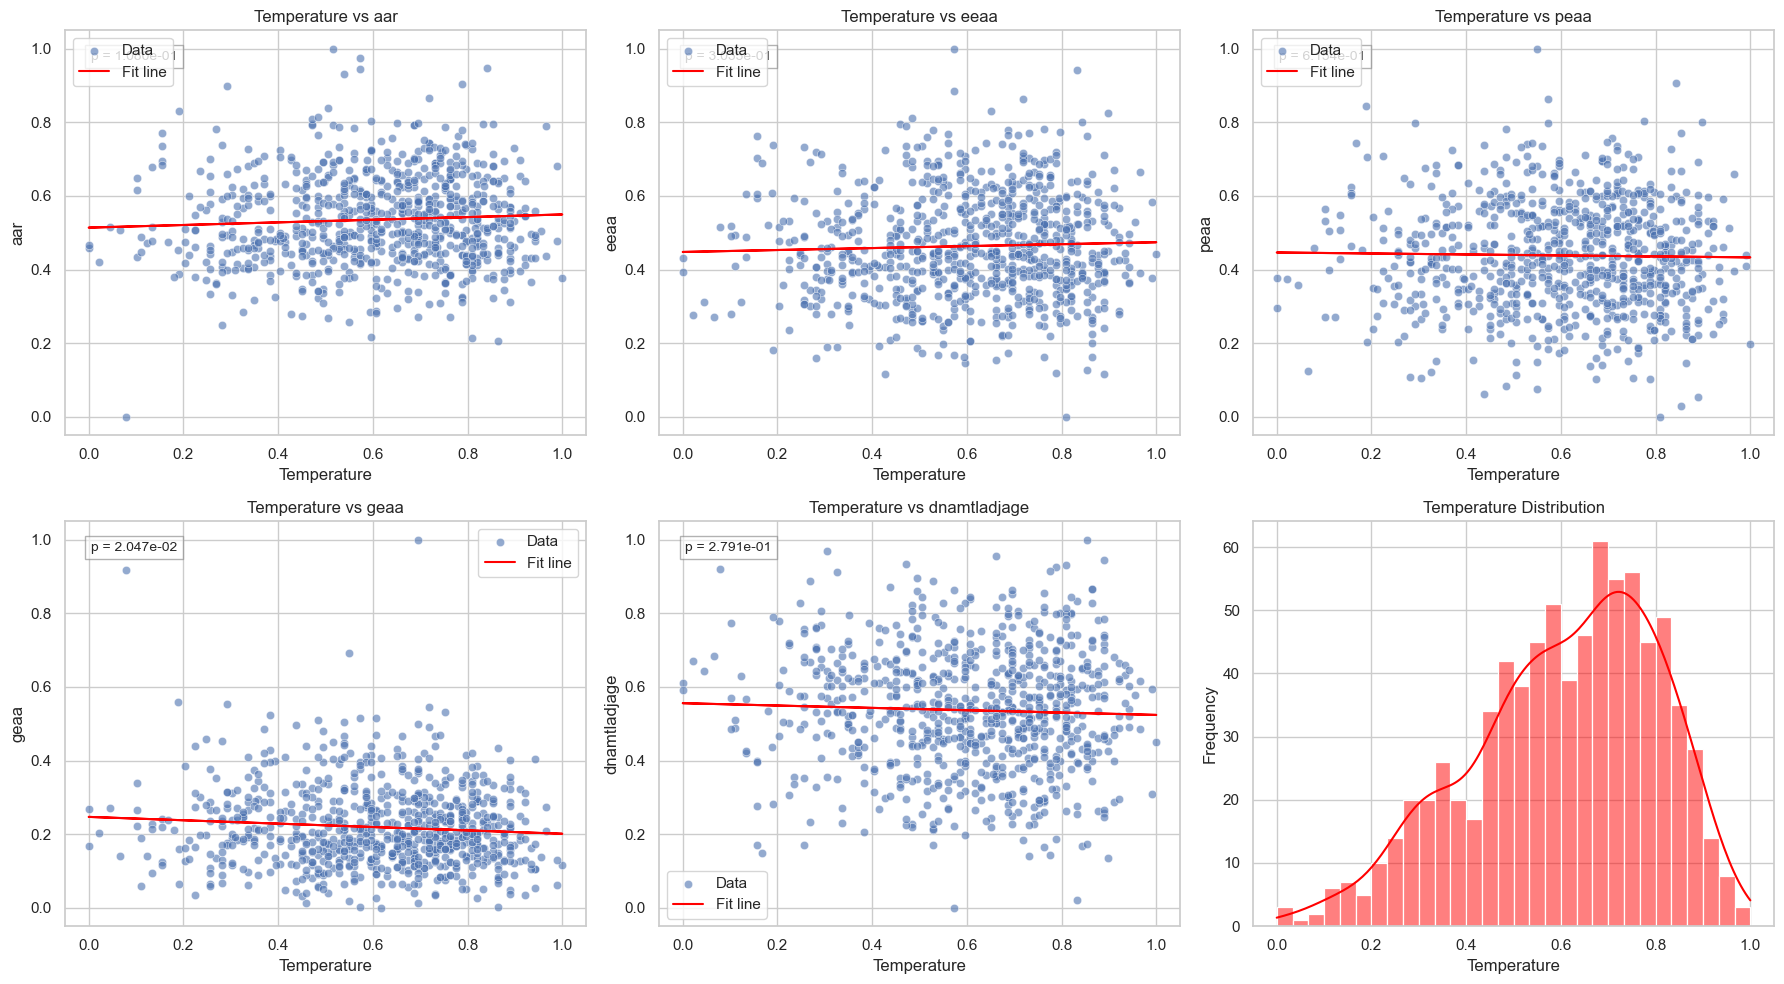

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# 设置Seaborn风格
sns.set(style="whitegrid")

# 定义因变量列表
dependent_vars = ['aar', 'eeaa', 'peaa', 'geaa', 'dnamtladjage']

# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# 绘制每个因变量与 Temperature 的散点图 + 拟合线 + p 值
for i, var in enumerate(dependent_vars):
    x = df['Temperature']
    y = df[var]

    # Seaborn散点图
    sns.scatterplot(x=x, y=y, ax=axes[i], alpha=0.6, label='Data')

    # 线性回归
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    axes[i].plot(x, line, color='red', label='Fit line')

    # 设置标题与轴
    axes[i].set_title(f'Temperature vs {var}')
    axes[i].set_xlabel('Temperature')
    axes[i].set_ylabel(var)
    axes[i].grid(True)

    # 添加 p 值注释
    axes[i].text(0.05, 0.95, f'p = {p_value:.3e}', transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top',
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

    # 添加图例
    axes[i].legend()

# 最后一幅图：Temperature 分布图
sns.histplot(df['Temperature'], bins=30, kde=True, ax=axes[-1], color='red', alpha=0.5)
axes[-1].set_title('Temperature Distribution')
axes[-1].set_xlabel('Temperature')
axes[-1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('Temperature_Plot.png', dpi=300)
plt.show()



Tukey HSD results for aar:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Baltimore    Chicago   0.0103 0.8377 -0.0214 0.0419  False
Baltimore         LA  -0.0044 0.9856 -0.0366 0.0279  False
Baltimore Pittsburgh   0.0366 0.0291  0.0026 0.0706   True
  Chicago         LA  -0.0146 0.6001 -0.0449 0.0157  False
  Chicago Pittsburgh   0.0263 0.1516 -0.0058 0.0585  False
       LA Pittsburgh    0.041 0.0073  0.0082 0.0737   True
----------------------------------------------------------

Tukey HSD results for eeaa:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Baltimore    Chicago   -0.003 0.9965 -0.0394 0.0333  False
Baltimore         LA  -0.0172 0.6281 -0.0542 0.0198  False
Baltimore Pittsburgh   0.0466 0.0118  0.0075 0.0856   True

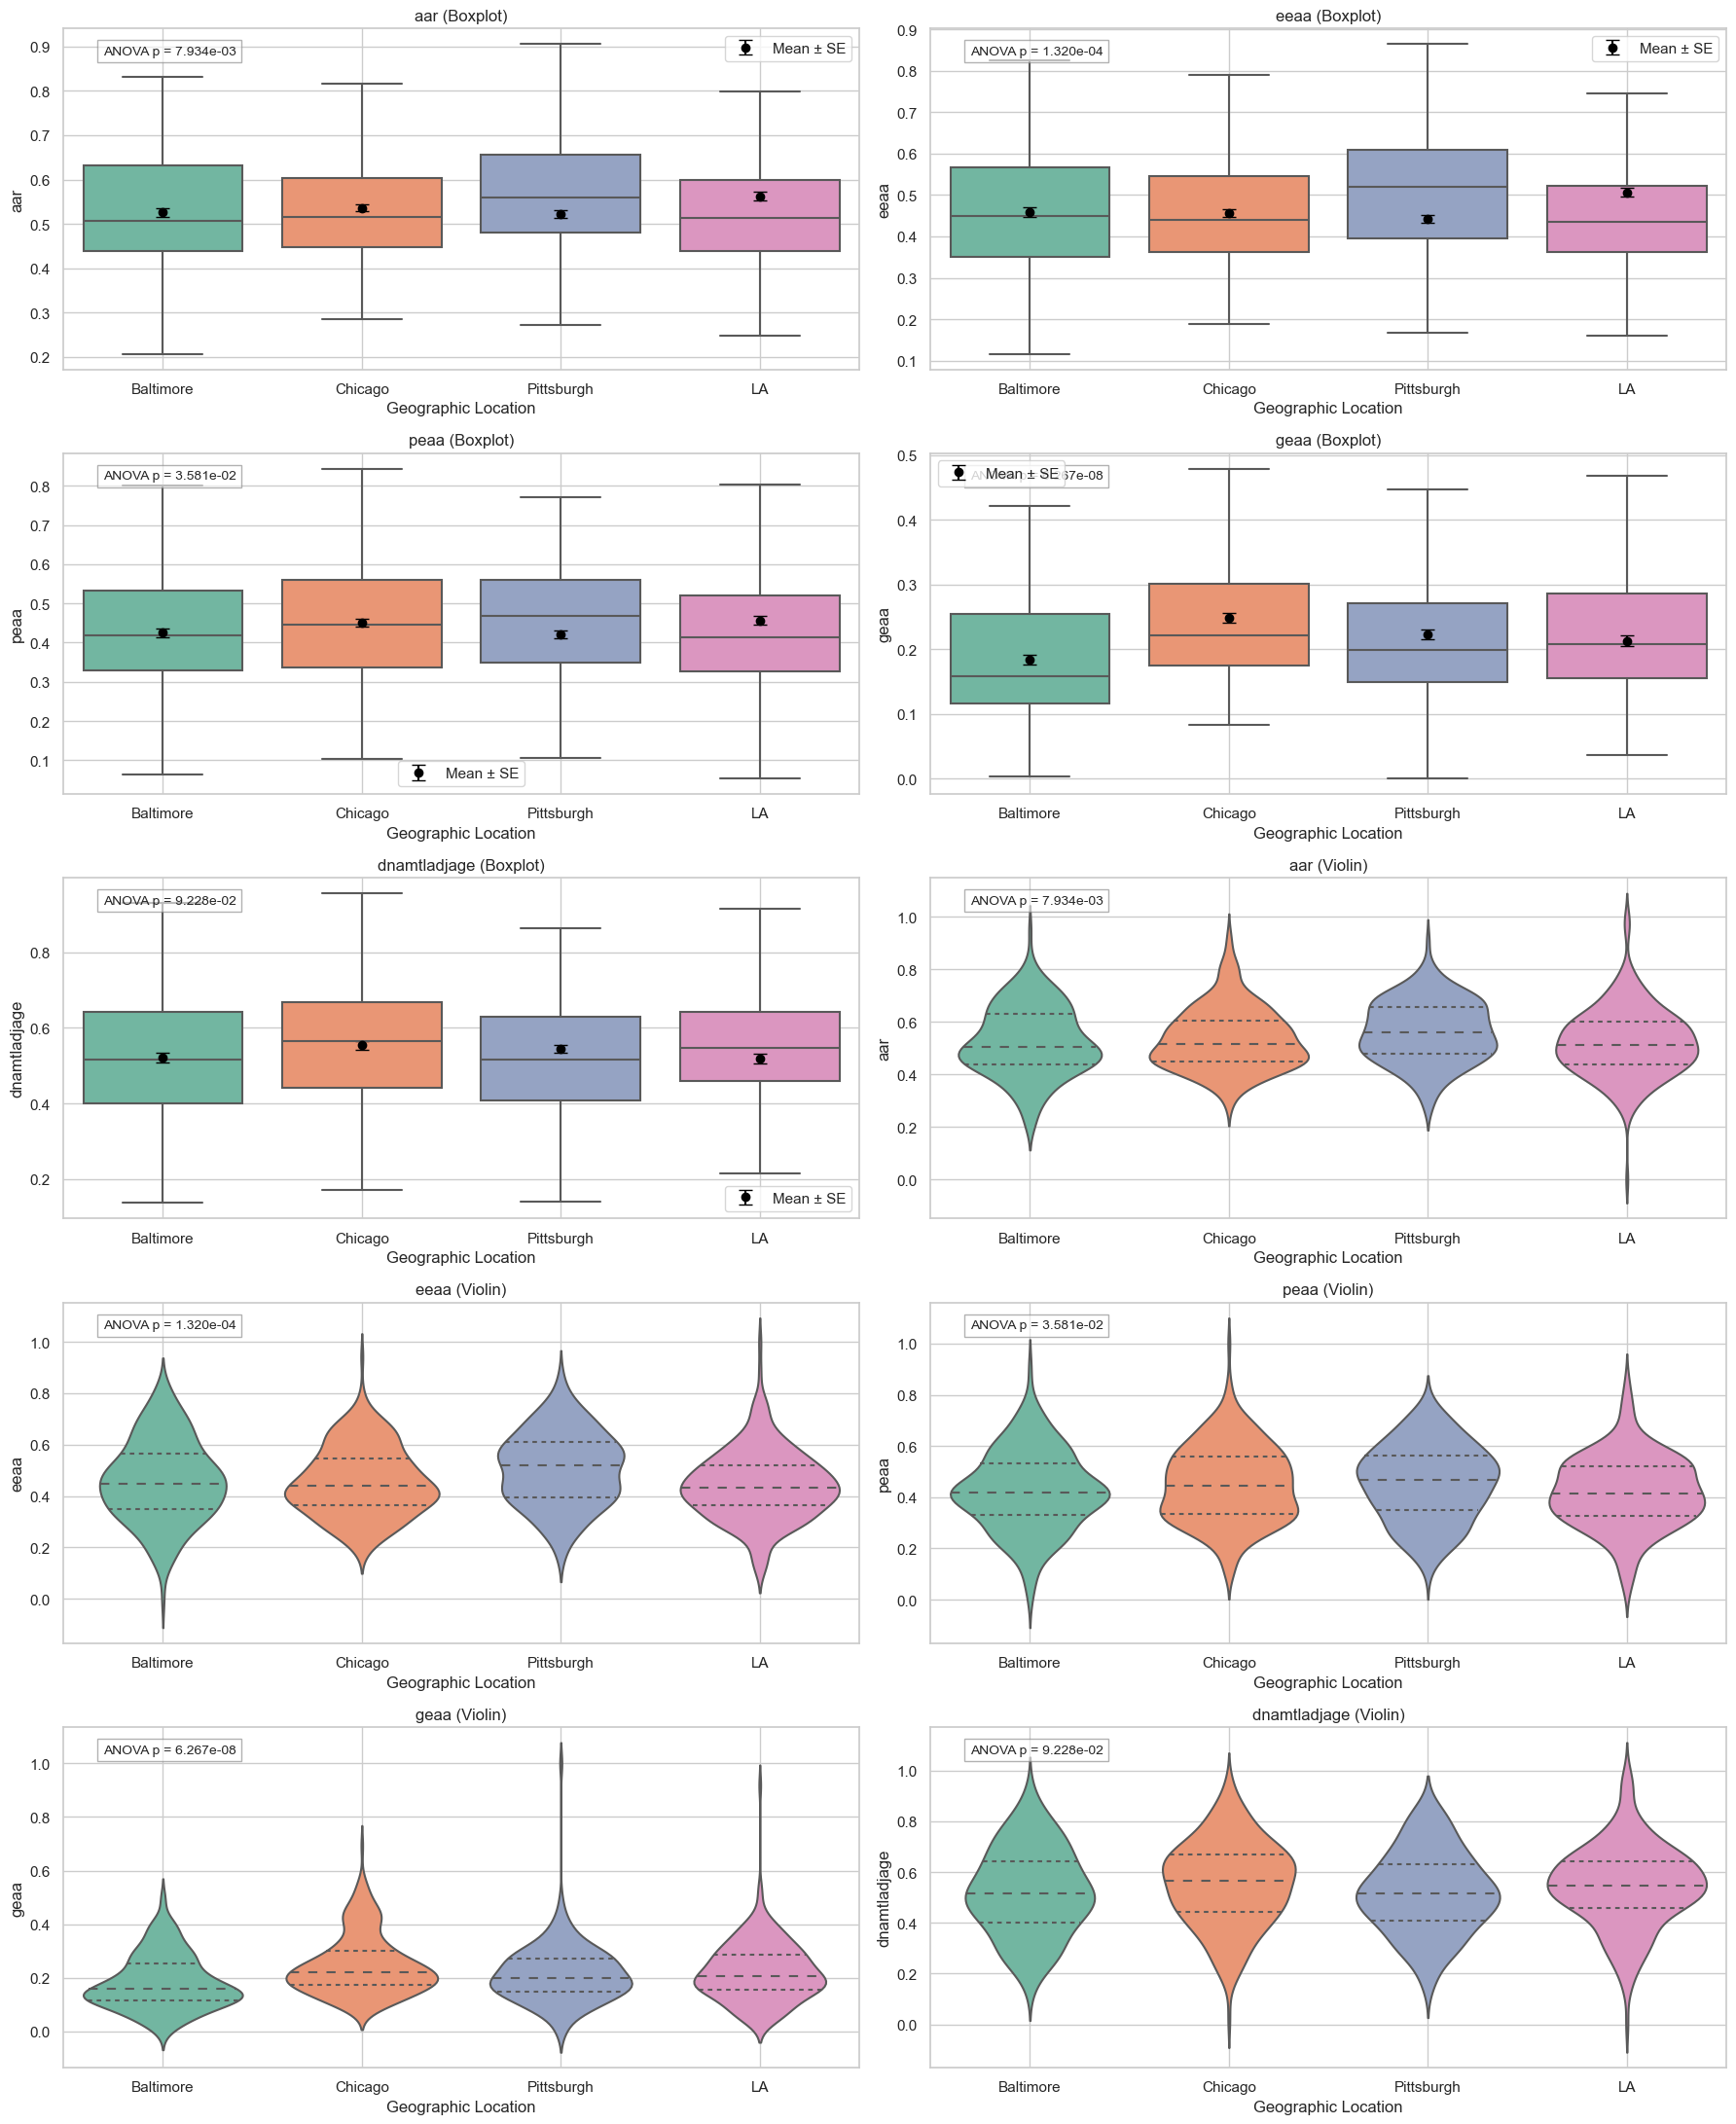

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 替换地理位置
location_mapping = {
    0: 'Baltimore',
    0.333333333: 'Chicago',
    1: 'Pittsburgh',
    0.666666667: 'LA'
}
df[df.columns[0]] = df[df.columns[0]].replace(location_mapping)
group_col = df.columns[0]

# 设置风格
sns.set(style="whitegrid")

# 因变量
dependent_vars = ['aar', 'eeaa', 'peaa', 'geaa', 'dnamtladjage']

# 创建图
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 22))
axes = axes.flatten()

# 遍历变量画图 + 添加p值 + Tukey分组差异
for i, var in enumerate(dependent_vars):
    ax_box = axes[i]
    ax_violin = axes[i + len(dependent_vars)]

    # 1. 箱线图 + 均值 ± SE
    sns.boxplot(data=df, x=group_col, y=var, ax=ax_box, palette="Set2", showfliers=False)
    means = df.groupby(group_col)[var].mean()
    sems = df.groupby(group_col)[var].sem()
    x_pos = range(len(means))
    ax_box.errorbar(x=x_pos, y=means, yerr=sems, fmt='o', color='black', capsize=5, label='Mean ± SE')

    # 2. ANOVA 总体 p 值
    model = ols(f'{var} ~ C({group_col})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    pval = anova_table['PR(>F)'][0]
    ax_box.text(0.05, 0.95, f'ANOVA p = {pval:.3e}', transform=ax_box.transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))
    ax_box.set_title(f'{var} (Boxplot)')
    ax_box.set_xlabel('Geographic Location')
    ax_box.set_ylabel(var)
    ax_box.legend()
    ax_box.grid(True)

    # 3. Violin plot + 同样标注
    sns.violinplot(data=df, x=group_col, y=var, ax=ax_violin, palette="Set2", inner="quartile")
    ax_violin.text(0.05, 0.95, f'ANOVA p = {pval:.3e}', transform=ax_violin.transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))
    ax_violin.set_title(f'{var} (Violin)')
    ax_violin.set_xlabel('Geographic Location')
    ax_violin.set_ylabel(var)
    ax_violin.grid(True)

    # 4. 可选：Tukey HSD 显著性分组结果打印
    tukey = pairwise_tukeyhsd(endog=df[var], groups=df[group_col], alpha=0.05)
    print(f'\nTukey HSD results for {var}:\n{tukey.summary()}')

plt.tight_layout()
plt.savefig('Location_with_Pvalues.png', dpi=300)
plt.show()


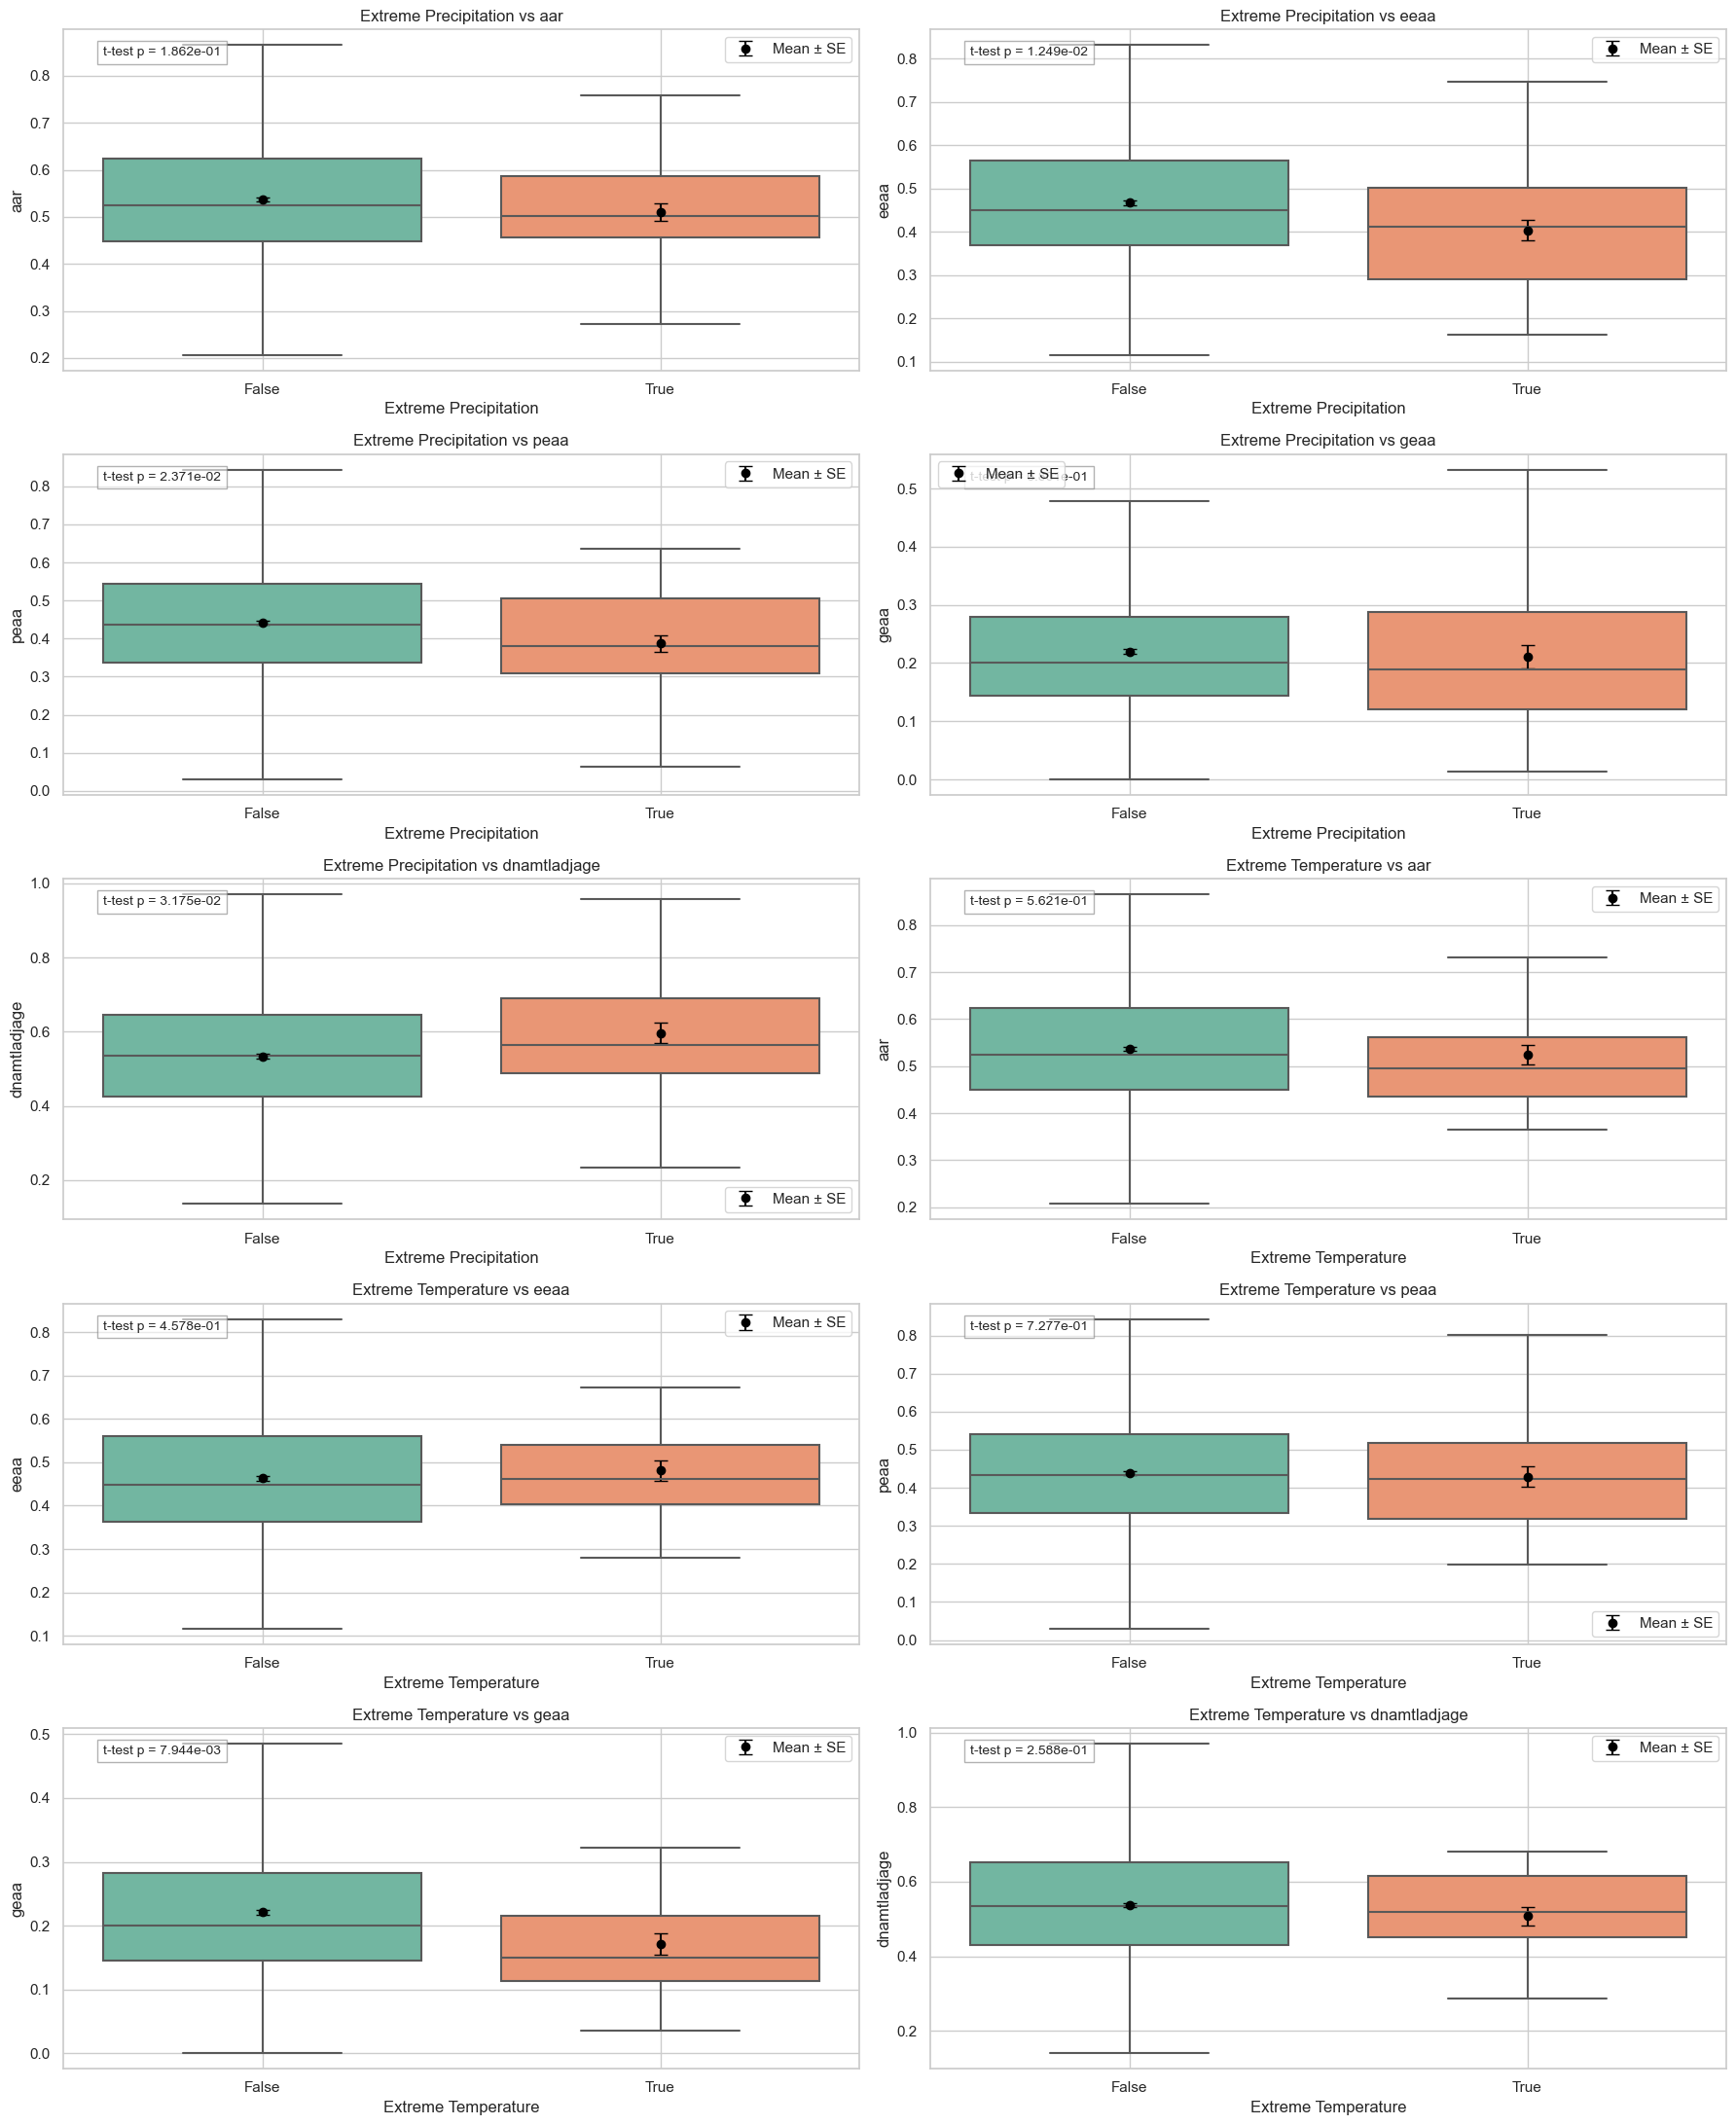

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 假设 df 是你的数据框
# 计算 95th 百分位数
precipitation_threshold = df['Precipitation'].quantile(0.95)
temperature_threshold = df['Temperature'].quantile(0.95)

# 添加极端天气标签
df['Extreme_Precipitation'] = df['Precipitation'] > precipitation_threshold
df['Extreme_Temperature'] = df['Temperature'] > temperature_threshold

# 因变量列表
dependent_vars = ['aar', 'eeaa', 'peaa', 'geaa', 'dnamtladjage']

# 创建图
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 22))
axes = axes.flatten()

# 可视化极端降水影响
for i, var in enumerate(dependent_vars):
    ax = axes[i]
    sns.boxplot(data=df, x='Extreme_Precipitation', y=var, ax=ax, palette="Set2", showfliers=False)

    # 计算每组均值 ± 标准误
    means = df.groupby('Extreme_Precipitation')[var].mean()
    sems = df.groupby('Extreme_Precipitation')[var].sem()
    x_pos = [0, 1]
    ax.errorbar(x=x_pos, y=means, yerr=sems, fmt='o', color='black', capsize=5, label='Mean ± SE')

    # t检验
    group1 = df[df['Extreme_Precipitation'] == False][var]
    group2 = df[df['Extreme_Precipitation'] == True][var]
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    ax.text(0.05, 0.95, f't-test p = {p_val:.3e}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

    ax.set_title(f'Extreme Precipitation vs {var}')
    ax.set_xlabel('Extreme Precipitation')
    ax.set_ylabel(var)
    ax.grid(True)
    ax.legend()

# 可视化极端温度影响
for i, var in enumerate(dependent_vars):
    ax = axes[i + len(dependent_vars)]
    sns.boxplot(data=df, x='Extreme_Temperature', y=var, ax=ax, palette="Set2", showfliers=False)

    # 计算均值 ± 标准误
    means = df.groupby('Extreme_Temperature')[var].mean()
    sems = df.groupby('Extreme_Temperature')[var].sem()
    x_pos = [0, 1]
    ax.errorbar(x=x_pos, y=means, yerr=sems, fmt='o', color='black', capsize=5, label='Mean ± SE')

    # t检验
    group1 = df[df['Extreme_Temperature'] == False][var]
    group2 = df[df['Extreme_Temperature'] == True][var]
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    ax.text(0.05, 0.95, f't-test p = {p_val:.3e}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

    ax.set_title(f'Extreme Temperature vs {var}')
    ax.set_xlabel('Extreme Temperature')
    ax.set_ylabel(var)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('Extreme_Weather_Impact_with_Pvalues.png', dpi=300)
plt.show()


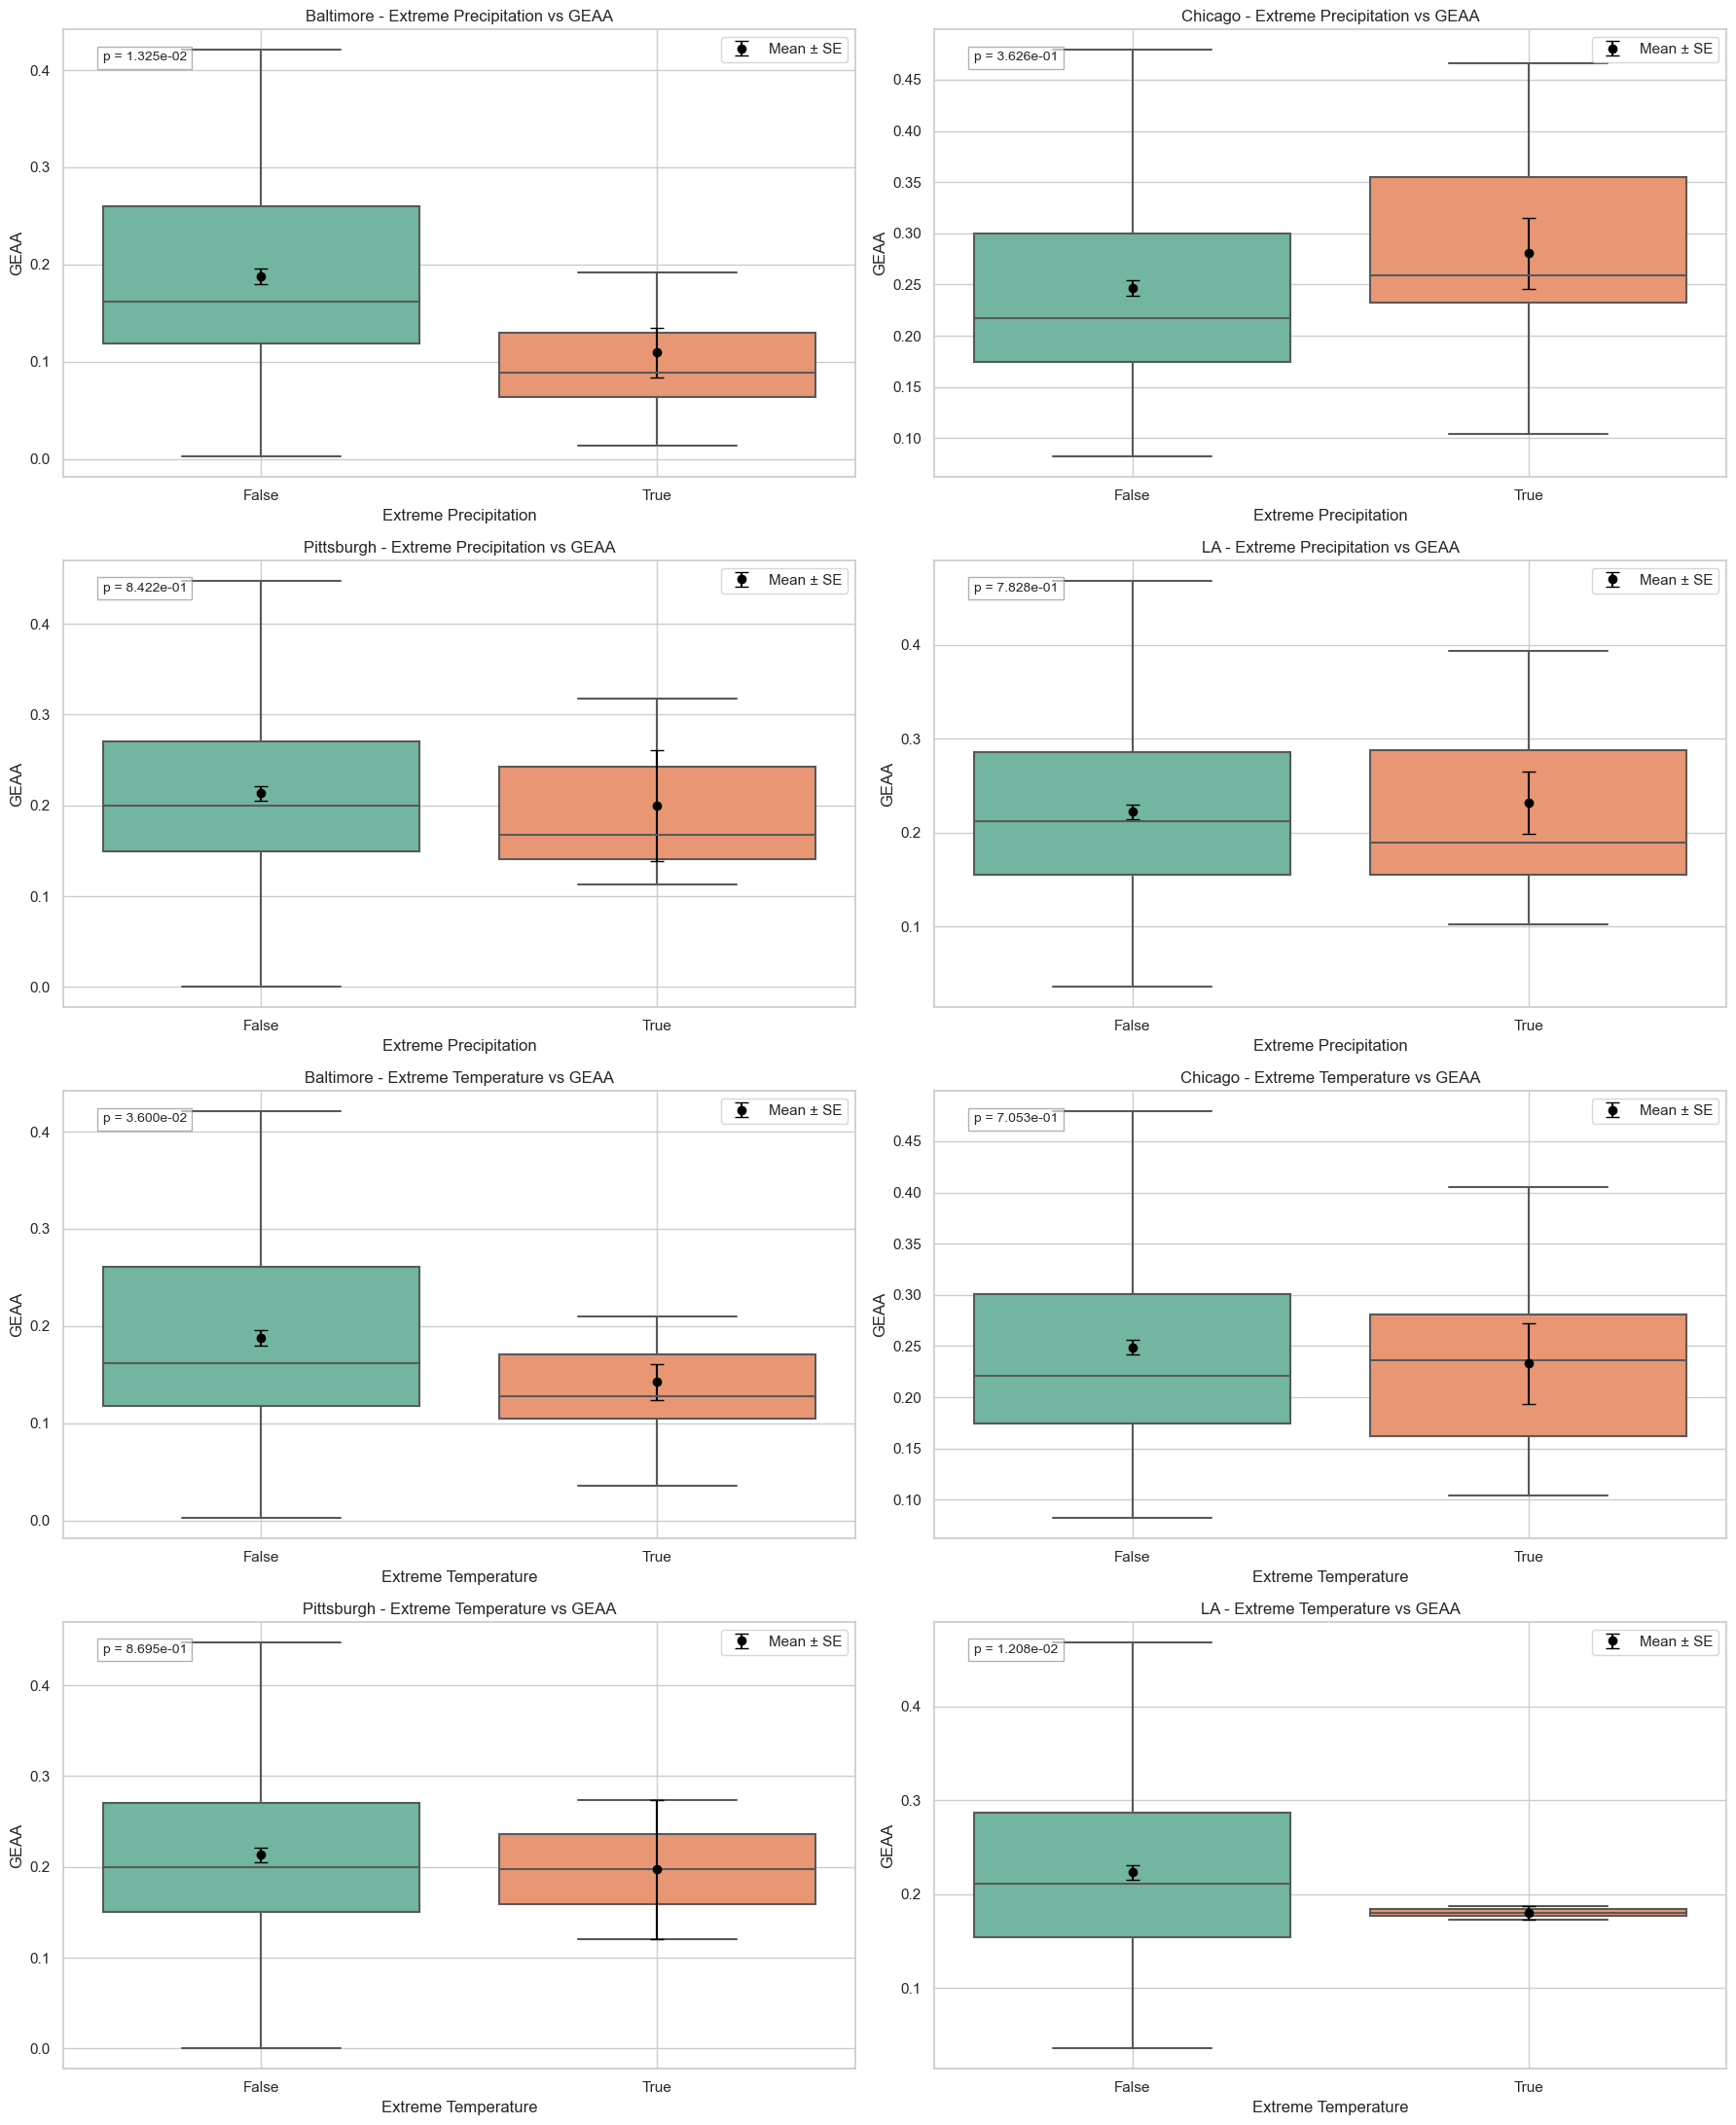

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 计算极端值阈值
precipitation_threshold = df['Precipitation'].quantile(0.95)
temperature_threshold = df['Temperature'].quantile(0.95)

# 添加极端天气标签
df['Extreme_Precipitation'] = df['Precipitation'] > precipitation_threshold
df['Extreme_Temperature'] = df['Temperature'] > temperature_threshold

# 提取城市列表
cities = df[df.columns[0]].unique()

# 创建图
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 22))
axes = axes.flatten()

# --- 1. 每城市 极端降水 vs GEAA ---
for i, city in enumerate(cities):
    city_data = df[df[df.columns[0]] == city]
    ax = axes[i]
    
    sns.boxplot(data=city_data, x='Extreme_Precipitation', y='geaa', ax=ax, palette="Set2", showfliers=False)

    # 添加误差条
    means = city_data.groupby('Extreme_Precipitation')['geaa'].mean()
    sems = city_data.groupby('Extreme_Precipitation')['geaa'].sem()
    x_pos = [0, 1]
    ax.errorbar(x=x_pos, y=means, yerr=sems, fmt='o', color='black', capsize=5, label='Mean ± SE')

    # 添加 t 检验结果
    group1 = city_data[city_data['Extreme_Precipitation'] == False]['geaa']
    group2 = city_data[city_data['Extreme_Precipitation'] == True]['geaa']
    if len(group1) > 1 and len(group2) > 1:
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        ax.text(0.05, 0.95, f'p = {p_val:.3e}', transform=ax.transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))
    
    ax.set_title(f'{city} - Extreme Precipitation vs GEAA')
    ax.set_xlabel('Extreme Precipitation')
    ax.set_ylabel('GEAA')
    ax.grid(True)
    ax.legend()

# --- 2. 每城市 极端温度 vs GEAA ---
for i, city in enumerate(cities):
    city_data = df[df[df.columns[0]] == city]
    ax = axes[i + len(cities)]

    sns.boxplot(data=city_data, x='Extreme_Temperature', y='geaa', ax=ax, palette="Set2", showfliers=False)

    # 添加误差条
    means = city_data.groupby('Extreme_Temperature')['geaa'].mean()
    sems = city_data.groupby('Extreme_Temperature')['geaa'].sem()
    x_pos = [0, 1]
    ax.errorbar(x=x_pos, y=means, yerr=sems, fmt='o', color='black', capsize=5, label='Mean ± SE')

    # 添加 t 检验结果
    group1 = city_data[city_data['Extreme_Temperature'] == False]['geaa']
    group2 = city_data[city_data['Extreme_Temperature'] == True]['geaa']
    if len(group1) > 1 and len(group2) > 1:
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        ax.text(0.05, 0.95, f'p = {p_val:.3e}', transform=ax.transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

    ax.set_title(f'{city} - Extreme Temperature vs GEAA')
    ax.set_xlabel('Extreme Temperature')
    ax.set_ylabel('GEAA')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig('Impact_of_extreme_weather_on_GEAA_by_city_with_pvalues.png', dpi=300)
plt.show()
